hellooo

The dataset for sentiment analysis can be downloaded here; download only the train.csv dataset:
https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data


The datasets for topic modelling is downloaded here:
https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews/data?select=Books_rating.csv
https://www.kaggle.com/datasets/gpreda/tokyo-olympics-2020-tweets/data
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

The data set for NER can be downloaded here:
https://www.kaggle.com/datasets/namanj27/ner-dataset

## Named Entity Recognition using SVM

In [1]:
import nltk
import pandas as pd
#from google.colab import drive
import io

#drive.mount('/content/drive')

# df = pd.read_csv(io.StringIO(uploaded['senti_anal_train.csv'].decode('utf-8')))
df = pd.read_csv('senti_anal_train.csv', encoding="cp1252")
df.head(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [2]:
# NER dataset stuff

# reading the ner training dataset
ner_df = pd.read_csv('ner_train.csv', encoding="cp1252")

ner_df['Sentence #'] = ner_df['Sentence #'].ffill()
ner_df['Sentence #'] = ner_df['Sentence #'].str.extract('(\d+)')

# turn everything in the Tag column to uppercase
ner_df['Tag'] = ner_df['Tag'].str.upper()

ner_df.head(10)

,Sentence #,Word,POS,Tag
0,1,Thousands,NNS,O
1,1,of,IN,O
2,1,demonstrators,NNS,O
3,1,have,VBP,O
4,1,marched,VBN,O
5,1,through,IN,O
6,1,London,NNP,B-GEO
7,1,to,TO,O
8,1,protest,VB,O
9,1,the,DT,O


In [3]:
ner_test = pd.read_csv('NER-test.tsv', error_bad_lines=False, sep='\t')
ner_test.head(20)

C:\Users\Jan\AppData\Local\Temp\ipykernel_14460\826138875.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ner_test = pd.read_csv('NER-test.tsv', error_bad_lines=False, sep='\t')


,sentence id,token id,token,BIO NER tag
0,0,0,I,O
1,0,1,would,O
2,0,2,n't,O
3,0,3,be,O
4,0,4,caught,O
5,0,5,dead,O
6,0,6,watching,O
7,0,7,the,O
8,0,8,NFL,B-ORG
9,0,9,if,O


In [4]:
len(ner_df)

1048575

In [5]:
# Initialize the features and labels for the training set
words_train = ner_df['Word'].tolist()
#pos_train = ner_df['POS'].tolist()
labels_train = ner_df['Tag'].tolist()

# initialize the features and labels for the test set
words_test = ner_test['token'].tolist()
#pos_test = ner_test['POS'].tolist()
labels_test = ner_test['BIO NER tag'].tolist()

In [6]:
# making dictionary of word and pos values for training set
training_features_df = []
training_gold_labels_df = []

for word, tag in zip(words_train, labels_train):
    a_dict = {
        'word': word,
    }
    training_features_df.append(a_dict)
    training_gold_labels_df.append(tag)

print(training_features_df[:10])
print(training_gold_labels_df[:10])

[{'word': 'Thousands'}, {'word': 'of'}, {'word': 'demonstrators'}, {'word': 'have'}, {'word': 'marched'}, {'word': 'through'}, {'word': 'London'}, {'word': 'to'}, {'word': 'protest'}, {'word': 'the'}]
['O', 'O', 'O', 'O', 'O', 'O', 'B-GEO', 'O', 'O', 'O']


In [7]:
# making dictionary of word values for test set
test_features_df = []
test_gold_labels_df = []

for word, tag in zip(words_test, labels_test):
    a_dict = {
        'word': word,
    }
    test_features_df.append(a_dict)
    test_gold_labels_df.append(tag)

print(test_features_df[:10])
print(test_gold_labels_df[:10])

[{'word': 'I'}, {'word': 'would'}, {'word': "n't"}, {'word': 'be'}, {'word': 'caught'}, {'word': 'dead'}, {'word': 'watching'}, {'word': 'the'}, {'word': 'NFL'}, {'word': 'if'}]
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O']


In [8]:
from collections import Counter

# looking at the frequency distribution of the training data
print(Counter(training_gold_labels_df))

# looking at the frequency distribution of the test data
print(Counter(test_gold_labels_df))

Counter({'O': 887908, 'B-GEO': 37644, 'B-TIM': 20333, 'B-ORG': 20143, 'I-PER': 17251, 'B-PER': 16990, 'I-ORG': 16784, 'B-GPE': 15870, 'I-GEO': 7414, 'I-TIM': 6528, 'B-ART': 402, 'B-EVE': 308, 'I-ART': 297, 'I-EVE': 253, 'B-NAT': 201, 'I-GPE': 198, 'I-NAT': 51})
Counter({'O': 160, 'I-WORK_OF_ART': 9, 'B-PER': 6, 'I-ORG': 6, 'B-WORK_OF_ART': 4, 'B-ORG': 3, 'I-PER': 3, 'B-DATE': 1, 'I-DATE': 1})


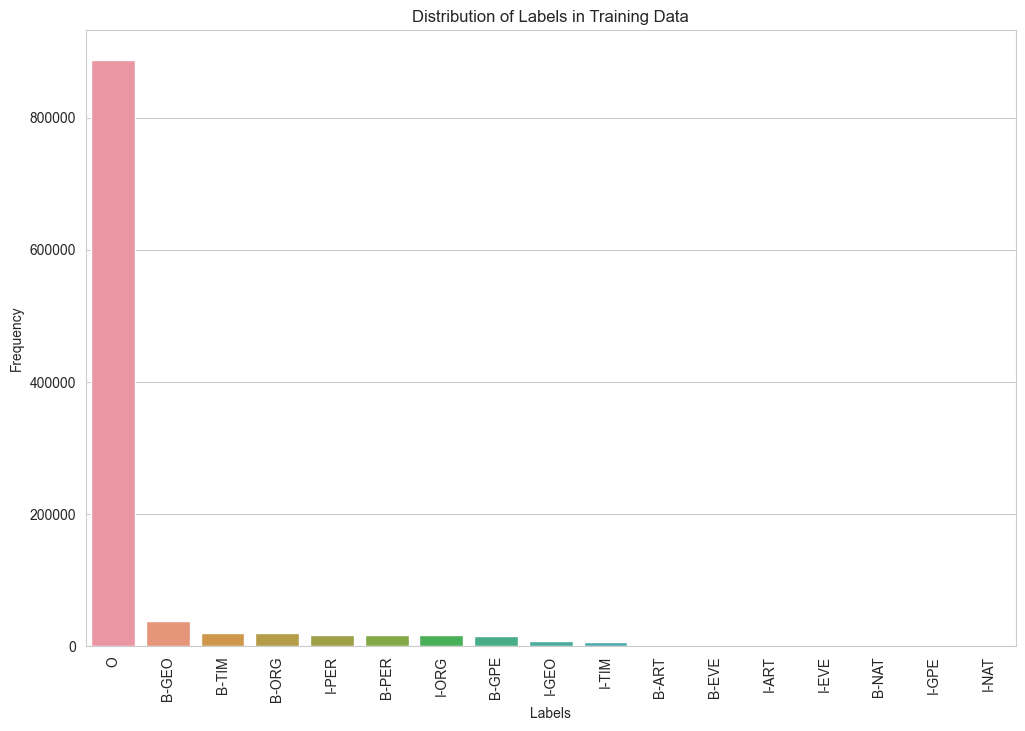

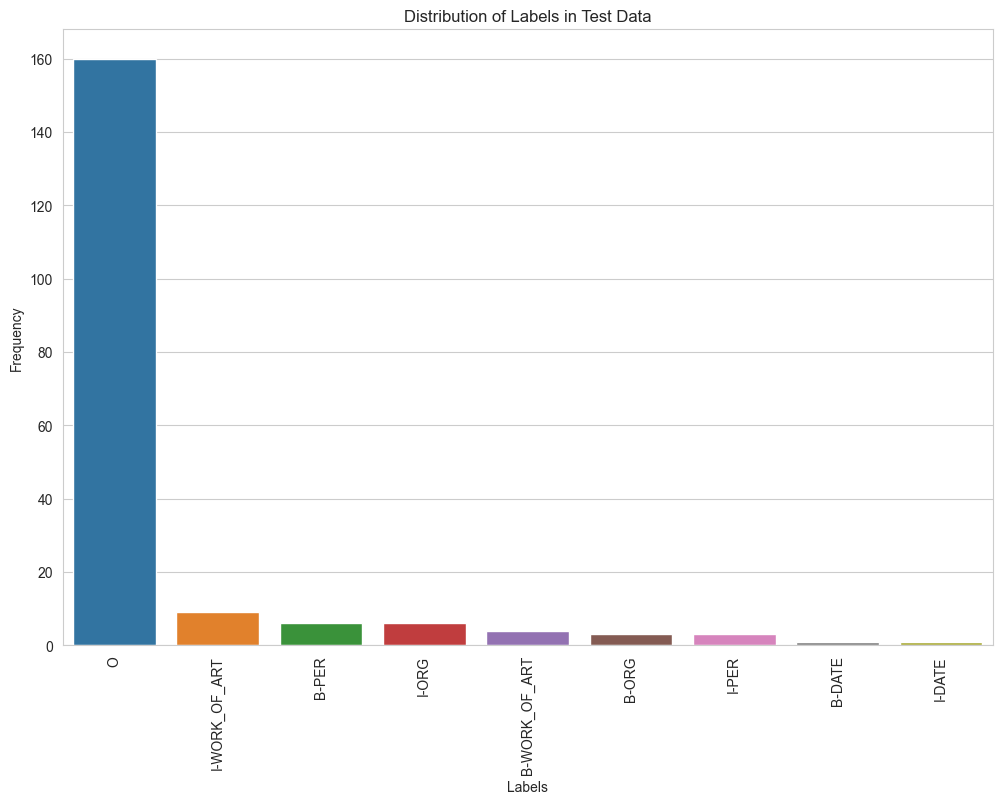

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Counter objects to Pandas Series
train_labels = pd.Series({'O': 887908, 'B-GEO': 37644, 'B-TIM': 20333, 'B-ORG': 20143, 'I-PER': 17251, 'B-PER': 16990, 'I-ORG': 16784, 'B-GPE': 15870, 'I-GEO': 7414, 'I-TIM': 6528, 'B-ART': 402, 'B-EVE': 308, 'I-ART': 297, 'I-EVE': 253, 'B-NAT': 201, 'I-GPE': 198, 'I-NAT': 51})
test_labels = pd.Series({'O': 160, 'I-WORK_OF_ART': 9, 'B-PER': 6, 'I-ORG': 6, 'B-WORK_OF_ART': 4, 'B-ORG': 3, 'I-PER': 3, 'B-DATE': 1, 'I-DATE': 1})

# Plot the training data
plt.figure(figsize=(12, 8))
sns.barplot(x=train_labels.index, y=train_labels.values)
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Plot the test data
plt.figure(figsize=(12, 8))
sns.barplot(x=test_labels.index, y=test_labels.values)
plt.title('Distribution of Labels in Test Data')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [10]:
from sklearn.feature_extraction import DictVectorizer

# Vectorize the train and test data and transofrm to array
vec = DictVectorizer()
concatenated_features = training_features_df + test_features_df
the_array = vec.fit_transform(concatenated_features)

training_features_array_df = the_array[:len(training_features_df)]
test_features_array_df = the_array[len(training_features_df):]

In [11]:
from sklearn import svm
from sklearn.metrics import classification_report
import numpy as np

# training the model
lin_clf = svm.LinearSVC()
lin_clf.fit(training_features_array_df, training_gold_labels_df)
prediction = lin_clf.predict(test_features_array_df)

In [12]:

# Get unique labels from true and predicted labels
unique_labels = np.unique(test_gold_labels_df)

# print classification report only for labels that appear in the true and predicted data
print(classification_report(test_gold_labels_df, prediction, labels=unique_labels))

               precision    recall  f1-score   support

       B-DATE       0.00      0.00      0.00         1
        B-ORG       0.50      0.33      0.40         3
        B-PER       0.67      0.33      0.44         6
B-WORK_OF_ART       0.00      0.00      0.00         4
       I-DATE       0.00      0.00      0.00         1
        I-ORG       1.00      0.17      0.29         6
        I-PER       0.00      0.00      0.00         3
I-WORK_OF_ART       0.00      0.00      0.00         9
            O       0.89      1.00      0.94       160

    micro avg       0.88      0.85      0.86       193
    macro avg       0.34      0.20      0.23       193
 weighted avg       0.80      0.85      0.81       193



C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(test_gold_labels_df, prediction)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8497409326424871


In [13]:
for i in range(len(prediction)):
  print("token : ", test_features_df[i])
  print("predicted: ", prediction[i])
  print("actual: ", test_gold_labels_df[i])
  print('\n')

# print(prediction)
# print(classification_report(test_gold_labels_df, lin_clf.predict(test_features_array_df)))

token :  {'word': 'I'}
predicted:  O
actual:  O


token :  {'word': 'would'}
predicted:  O
actual:  O


token :  {'word': "n't"}
predicted:  O
actual:  O


token :  {'word': 'be'}
predicted:  O
actual:  O


token :  {'word': 'caught'}
predicted:  O
actual:  O


token :  {'word': 'dead'}
predicted:  O
actual:  O


token :  {'word': 'watching'}
predicted:  O
actual:  O


token :  {'word': 'the'}
predicted:  O
actual:  O


token :  {'word': 'NFL'}
predicted:  B-ORG
actual:  B-ORG


token :  {'word': 'if'}
predicted:  O
actual:  O


token :  {'word': 'it'}
predicted:  O
actual:  O


token :  {'word': 'were'}
predicted:  O
actual:  O


token :  {'word': "n't"}
predicted:  O
actual:  O


token :  {'word': 'for'}
predicted:  O
actual:  O


token :  {'word': 'Taylor'}
predicted:  I-PER
actual:  B-PER


token :  {'word': 'Swift'}
predicted:  B-ORG
actual:  I-PER


token :  {'word': '.'}
predicted:  O
actual:  O


token :  {'word': 'Chris'}
predicted:  B-PER
actual:  B-PER


token :  {'word': "O

In [14]:
# zoe: ill write a reflection on the NER model above

In [15]:
# not working yet

movies = pd.read_csv('movie_dataset.csv', error_bad_lines=False)
movies.head(10)

C:\Users\Jan\AppData\Local\Temp\ipykernel_14460\635239289.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  movies = pd.read_csv('movie_dataset.csv', error_bad_lines=False)


FileNotFoundError: [Errno 2] No such file or directory: 'movie_dataset.csv'

## Named Entity Recognition using transformers

In [16]:
from simpletransformers.ner import NERModel
#sentences = ["Example sentence 1", "Example sentence 2"]
englishmodel = NERModel(
        model_type="bert",
        model_name="dslim/bert-base-NER",
        use_cuda=False
)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
# use the NER model to predict the named entities in the test set
test_df = pd.read_csv('NER-test.tsv', error_bad_lines=False, sep='\t')
test_sentences = test_df['token'].tolist()
predictions, raw_outputs = englishmodel.predict(test_sentences)

# print the predictions
for i in range(len(predictions)):
    print(f"Token: {test_sentences[i]}")
    print(f"Predicted NER Tag: {predictions[i]}")
    print(f"Actual NER Tag: {test_df['BIO NER tag'][i]}")
    print("\n")

C:\Users\Jan\AppData\Local\Temp\ipykernel_14460\4258451043.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv('NER-test.tsv', error_bad_lines=False, sep='\t')


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/2 [00:00<?, ?it/s]

Token: I
Predicted NER Tag: [{'I': 'O'}]
Actual NER Tag: O


Token: would
Predicted NER Tag: [{'would': 'O'}]
Actual NER Tag: O


Token: n't
Predicted NER Tag: [{"n't": 'O'}]
Actual NER Tag: O


Token: be
Predicted NER Tag: [{'be': 'O'}]
Actual NER Tag: O


Token: caught
Predicted NER Tag: [{'caught': 'O'}]
Actual NER Tag: O


Token: dead
Predicted NER Tag: [{'dead': 'O'}]
Actual NER Tag: O


Token: watching
Predicted NER Tag: [{'watching': 'O'}]
Actual NER Tag: O


Token: the
Predicted NER Tag: [{'the': 'O'}]
Actual NER Tag: O


Token: NFL
Predicted NER Tag: [{'NFL': 'B-ORG'}]
Actual NER Tag: B-ORG


Token: if
Predicted NER Tag: [{'if': 'O'}]
Actual NER Tag: O


Token: it
Predicted NER Tag: [{'it': 'O'}]
Actual NER Tag: O


Token: were
Predicted NER Tag: [{'were': 'O'}]
Actual NER Tag: O


Token: n't
Predicted NER Tag: [{"n't": 'O'}]
Actual NER Tag: O


Token: for
Predicted NER Tag: [{'for': 'O'}]
Actual NER Tag: O


Token: Taylor
Predicted NER Tag: [{'Taylor': 'B-PER'}]
Actual NER Ta

In [18]:
print(predictions)

[[{'I': 'O'}], [{'would': 'O'}], [{"n't": 'O'}], [{'be': 'O'}], [{'caught': 'O'}], [{'dead': 'O'}], [{'watching': 'O'}], [{'the': 'O'}], [{'NFL': 'B-ORG'}], [{'if': 'O'}], [{'it': 'O'}], [{'were': 'O'}], [{"n't": 'O'}], [{'for': 'O'}], [{'Taylor': 'B-PER'}], [{'Swift': 'B-PER'}], [{'.': 'O'}], [{'Chris': 'B-PER'}], [{"O'Donnell": 'B-PER'}], [{'stated': 'O'}], [{'that': 'O'}], [{'while': 'O'}], [{'filming': 'O'}], [{'for': 'O'}], [{'this': 'O'}], [{'movie': 'O'}], [{',': 'O'}], [{'he': 'O'}], [{'felt': 'O'}], [{'like': 'O'}], [{'he': 'O'}], [{'was': 'O'}], [{'in': 'O'}], [{'a': 'O'}], [{'Toys': 'O'}], [{"''": 'O'}], [{'R': 'O'}], [{"''": 'O'}], [{'Us': 'O'}], [{'commercial': 'O'}], [{'.': 'O'}], [{'The': 'O'}], [{'whole': 'O'}], [{'game': 'O'}], [{'was': 'O'}], [{'a': 'O'}], [{'rollercoaster': 'O'}], [{'ride': 'O'}], [{',': 'O'}], [{'but': 'O'}], [{'Los': 'B-ORG'}], [{'Angeles': 'B-LOC'}], [{'Lakers': 'B-ORG'}], [{'ultimately': 'O'}], [{'persevered': 'O'}], [{'and': 'O'}], [{'won': 'O'}

In [19]:
# print the classification report, remember to extract the predicted label from the dictionary
from sklearn.metrics import classification_report

# extract the values from the list of dictionaries
predicted_labels = [list(x[0].values())[0] for x in predictions]
# omit the classes that have 0 instances in the classification report
print(classification_report(test_df['BIO NER tag'], predicted_labels, labels=unique_labels))

               precision    recall  f1-score   support

       B-DATE       0.00      0.00      0.00         1
        B-ORG       0.50      0.67      0.57         3
        B-PER       0.56      0.83      0.67         6
B-WORK_OF_ART       0.00      0.00      0.00         4
       I-DATE       0.00      0.00      0.00         1
        I-ORG       0.00      0.00      0.00         6
        I-PER       0.00      0.00      0.00         3
I-WORK_OF_ART       0.00      0.00      0.00         9
            O       0.90      0.99      0.94       160

    micro avg       0.87      0.86      0.87       193
    macro avg       0.22      0.28      0.24       193
 weighted avg       0.77      0.86      0.81       193



C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Named Entity Recognition using spaCy

In [20]:
import spacy

nlp_spacy= spacy.load("en_core_web_sm")

# prcess the test data
test_df = pd.read_csv('NER-test.tsv', error_bad_lines=False, sep='\t')
test_sentences = test_df['token'].tolist()

# for each token in the test data, predict the IOB and named entity, print as i.e. token: IOB - named entity, but only if the IOB is not 'O'
# save the output and print the classification report
output = []
for sentence in test_sentences:
    doc = nlp_spacy(sentence)
    for token in doc:
        if token.ent_iob_ != 'O':
            output.append(f"{token.text}: {token.ent_iob_}-{token.ent_type_}")
        else:
            output.append(f"{token.text}: {token.ent_iob_}")

#print("\n".join(output))
# save only the tags from the output and do a classification report
tags = [x.split(":")[1].strip() for x in output]
print(tags)
print(classification_report(test_df['BIO NER tag'], tags, labels=unique_labels))

C:\Users\Jan\AppData\Local\Temp\ipykernel_14460\3883194913.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv('NER-test.tsv', error_bad_lines=False, sep='\t')


['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'B-PERSON', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-GPE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'O', 'B-CARDINAL', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-TIME', 'O', 'B-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'B-ORDINAL', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'O', 'O', 'O', 'O',

C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## TOPIC MODELING - SUPERVISED

In [21]:
# load all datasets
books_df = pd.read_csv('Books_rating.csv')
movies_df = pd.read_csv('IMDB Dataset.csv')
sports_df = pd.read_csv('tokyo_2020_tweets.csv')

C:\Users\Jan\AppData\Local\Temp\ipykernel_14460\440297568.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  sports_df = pd.read_csv('tokyo_2020_tweets.csv')


In [22]:
books_df.head(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


In [23]:
movies_df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [24]:
sports_df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45.0,39.0,293.0,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235.0,5.0,2969.0,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646.0,3.0,5.0,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975.0,2724.0,36554.0,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6.0,37.0,31.0,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False
5,1418885092571766792,Sab Joke H,India,Follows you,2020-09-05 19:50:35,107.0,88.0,102.0,False,2021-07-24 10:45:42,#Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...,"['Tokyo2020', 'Olympics', 'MirabaiChanu', 'Wei...",Twitter for Android,0.0,0.0,False
6,1418880445161353228,evija87,City by the water,Eva. | Watch Lucifer on Netflix📺 coming MAY 28TH,2009-12-01 23:55:34,224.0,652.0,84310.0,False,2021-07-24 10:27:14,Can't help but cheer for them. Banda 6 goals i...,NaN,Twitter Web App,0.0,0.0,False
7,1418889399203475466,INQUIRER Sports,Manila,The official Twitter account of INQUIRER Sport...,2009-11-11 08:20:00,48937.0,522.0,555.0,True,2021-07-24 11:02:49,@inquirerdotnet @ftjochoaINQ Caloy Yulo's 14.0...,NaN,TweetDeck,0.0,0.0,False
8,1418889399081656321,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103976.0,2724.0,36554.0,True,2021-07-24 11:02:49,Q3 🇨🇦 1-4 🇩🇪\n\nGreen card for Canada's captai...,"['Tokyo2020', 'CANvGER']",Twitter Web App,0.0,0.0,False
9,1418889398670794759,Prashanth Kommunje,"Puttur, Karnataka,India",ಹಿಂದುಸ್ಥಾನದ ಹೆಮ್ಮೆಯ ತುಳುನಾಡ ಕನ್ನಡಿಗ,2012-01-07 16:26:20,76.0,175.0,1406.0,False,2021-07-24 11:02:48,Hearty Congratulations to \nIndian Railways 🏋️...,NaN,Twitter for Android,0.0,0.0,False


In [25]:
# change the books_df to only have the review column and a new column called 'topic' with value 'books' change the review column name to 'text'

books_df = books_df[['review/text']]
books_df = books_df.rename(columns={'review/text':'text'})
books_df['topic'] = 'book'
books_df.head(10)

,text,topic
0,This is only for Julie Strain fans. It's a col...,book
1,I don't care much for Dr. Seuss but after read...,book
2,"If people become the books they read and if ""t...",book
3,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",book
4,Philip Nel - Dr. Seuss: American IconThis is b...,book
5,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",book
6,Theodor Seuss Giesel was best known as 'Dr. Se...,book
7,When I recieved this book as a gift for Christ...,book
8,Trams (or any public transport) are not usuall...,book
9,"As far as I am aware, this is the first book-l...",book


In [26]:
# change the movies_df to only have the review column and a new column called 'topic' with value 'movies', change the review column name to 'text'

movies_df = movies_df[['review']]
movies_df = movies_df.rename(columns={'review':'text'})
movies_df['topic'] = 'movie'
movies_df.head(10)

,text,topic
0,One of the other reviewers has mentioned that ...,movie
1,A wonderful little production. <br /><br />The...,movie
2,I thought this was a wonderful way to spend ti...,movie
3,Basically there's a family where a little boy ...,movie
4,"Petter Mattei's ""Love in the Time of Money"" is...",movie
5,"Probably my all-time favorite movie, a story o...",movie
6,I sure would like to see a resurrection of a u...,movie
7,"This show was an amazing, fresh & innovative i...",movie
8,Encouraged by the positive comments about this...,movie
9,If you like original gut wrenching laughter yo...,movie


In [27]:
# change the sports_df to only have the tweet column and a new column called 'topic' with value 'sports'
sports_df = sports_df[['text']]
sports_df['topic'] = 'sports'
sports_df.head(10)

,text,topic
0,Let the party begin\n#Tokyo2020,sports
1,Congratulations #Tokyo2020 https://t.co/8OFKMs...,sports
2,Big Breaking Now \n\nTokyo Olympic Update \n\n...,sports
3,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,sports
4,All I can think of every time I watch the ring...,sports
5,#Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...,sports
6,Can't help but cheer for them. Banda 6 goals i...,sports
7,@inquirerdotnet @ftjochoaINQ Caloy Yulo's 14.0...,sports
8,Q3 🇨🇦 1-4 🇩🇪\n\nGreen card for Canada's captai...,sports
9,Hearty Congratulations to \nIndian Railways 🏋️...,sports


book      3000000
sports     297011
movie       50000
Name: topic, dtype: int64


<Axes: ylabel='topic'>

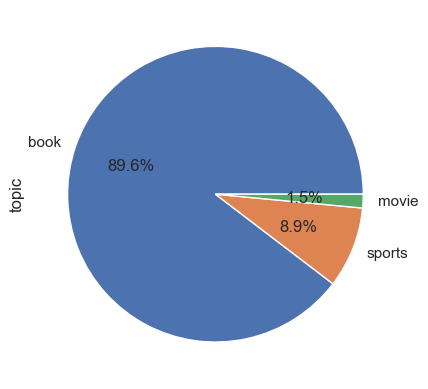

In [57]:
# concatenate all the dataframes and print the number of instances in each topic
all_df = pd.concat([books_df, movies_df, sports_df])
print(all_df['topic'].value_counts())

# make a piechart of the number of instances in each topic
# give the plot a title

import matplotlib.pyplot as plt

all_df['topic'].value_counts().plot.pie(autopct='%1.1f%%')

In [29]:
all_df.head(10)

,text,topic
0,This is only for Julie Strain fans. It's a col...,book
1,I don't care much for Dr. Seuss but after read...,book
2,"If people become the books they read and if ""t...",book
3,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",book
4,Philip Nel - Dr. Seuss: American IconThis is b...,book
5,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",book
6,Theodor Seuss Giesel was best known as 'Dr. Se...,book
7,When I recieved this book as a gift for Christ...,book
8,Trams (or any public transport) are not usuall...,book
9,"As far as I am aware, this is the first book-l...",book


In [30]:
# train the classifier
# use the bag of wods model to represent the text data
# use tf-idf weights as the information value of the words

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Check if there are any NaN values in the 'text' column
if all_df['text'].isna().any():
    # Option 1: Remove rows with NaN values
    #all_df = all_df.dropna(subset=['text'])

    # Option 2: Replace NaN values with a string
    all_df['text'] = all_df['text'].fillna('')


# do not split the data into train and test set
X = all_df['text']
y = all_df['topic']

# use the tf-idf vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# train the classifier
clf = LinearSVC()
clf.fit(X, y)


LinearSVC()

In [31]:
# predict the topic in sentiment-topic-test.csv
test_df = pd.read_csv('sentiment-topic-test.tsv', delimiter='\t')
X_test = test_df['text']
X_test = vectorizer.transform(X_test)
y_test = test_df['topic']

# print the classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

        book       0.60      1.00      0.75         3
       movie       1.00      0.50      0.67         4
      sports       0.67      0.67      0.67         3

    accuracy                           0.70        10
   macro avg       0.76      0.72      0.69        10
weighted avg       0.78      0.70      0.69        10



In [32]:
# print the predictions
predictions = clf.predict(X_test)
for i in range(len(predictions)):
    print(f"Text: {test_df['text'][i]}")
    print(f"Predicted Topic: {predictions[i]}")
    print(f"Actual Topic: {y_test[i]}")
    print("\n")

Text: I wouldn't be caught dead watching the NFL if it weren't for Taylor Swift.
Predicted Topic: sports
Actual Topic: sports


Text: Chris O'Donnell stated that while filming for this movie, he felt like he was in a Toys ''R'' Us commercial.
Predicted Topic: movie
Actual Topic: movie


Text: The whole game was a rollercoaster ride, but Los Angeles Lakers ultimately persevered and won!
Predicted Topic: book
Actual Topic: sports


Text: Zendaya slayed in Dune 2, as she does in all her movies.
Predicted Topic: sports
Actual Topic: movie


Text: While my favorite player was playing this match and started off strongggg, it went downhill after Messi's injyry midgame.
Predicted Topic: sports
Actual Topic: sports


Text: My uncle's brother's neighbor's cat's veterinarian David reads the communist manifesto in his spare time.
Predicted Topic: book
Actual Topic: book


Text: He said that The Great Gatsby is the best novell ever, and I was about to throw hands.
Predicted Topic: book
Actual Topic

## Sentiment Analysis with sci-kit learn

In [33]:
import nltk

In [34]:
# load the sentiment analysis dataset
senti_df = pd.read_csv('senti_anal_train.csv', encoding="cp1252")
senti_df.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [35]:
senti_df = senti_df[['text', 'sentiment']]
senti_df.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64


<Axes: ylabel='sentiment'>

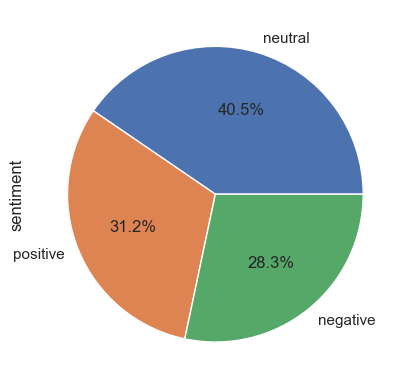

In [58]:
# print the number of instances in each sentiment
print(senti_df['sentiment'].value_counts())
# make a piechart of the number of instances in each sentiment

senti_df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')

In [37]:
senti_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, stop_words='english')

In [38]:
senti_df['text'] = senti_df['text'].fillna('')
senti_counts = senti_vec.fit_transform(senti_df['text'])

C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
senti_tfidf = tfidf_transformer.fit_transform(senti_counts)

In [40]:
from sklearn.naive_bayes import MultinomialNB

senti_clf = MultinomialNB().fit(senti_tfidf, senti_df['sentiment'])

# predict the sentiment of the test set
test_df = pd.read_csv('sentiment-topic-test.tsv', delimiter='\t')
test_counts = senti_vec.transform(test_df['text'])
test_tfidf = tfidf_transformer.transform(test_counts)

predictions = senti_clf.predict(test_tfidf)

# print the classification report
print(classification_report(test_df['sentiment'], predictions))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.38      1.00      0.55         3
    positive       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.12      0.33      0.18        10
weighted avg       0.11      0.30      0.16        10



C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# print the predictions
for i in range(len(predictions)):
    print(f"Text: {test_df['text'][i]}")
    print(f"Predicted Sentiment: {predictions[i]}")
    print(f"Actual Sentiment: {test_df['sentiment'][i]}")
    print("\n")

Text: I wouldn't be caught dead watching the NFL if it weren't for Taylor Swift.
Predicted Sentiment: neutral
Actual Sentiment: negative


Text: Chris O'Donnell stated that while filming for this movie, he felt like he was in a Toys ''R'' Us commercial.
Predicted Sentiment: neutral
Actual Sentiment: neutral


Text: The whole game was a rollercoaster ride, but Los Angeles Lakers ultimately persevered and won!
Predicted Sentiment: neutral
Actual Sentiment: positive


Text: Zendaya slayed in Dune 2, as she does in all her movies.
Predicted Sentiment: neutral
Actual Sentiment: positive


Text: While my favorite player was playing this match and started off strongggg, it went downhill after Messi's injyry midgame.
Predicted Sentiment: positive
Actual Sentiment: negative


Text: My uncle's brother's neighbor's cat's veterinarian David reads the communist manifesto in his spare time.
Predicted Sentiment: neutral
Actual Sentiment: neutral


Text: He said that The Great Gatsby is the best novel

## Sentiment Analysis with VADER

In [42]:
def vader_output_to_label(vader_output):
    """
    map vader output e.g.,
    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
    to one of the following values:
    a) positive float -> 'positive'
    b) 0.0 -> 'neutral'
    c) negative float -> 'negative'

    :param dict vader_output: output dict from vader

    :rtype: str
    :return: 'negative' | 'neutral' | 'positive'
    """
    compound = vader_output['compound']

    if compound < 0:
        return 'negative'
    elif compound == 0.0:
        return 'neutral'
    elif compound > 0.0:
        return 'positive'

assert vader_output_to_label( {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.0}) == 'neutral'
assert vader_output_to_label( {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.01}) == 'positive'
assert vader_output_to_label( {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': -0.01}) == 'negative'

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader_model = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(text):
    """
    perform sentiment analysis on the given text using VADER

    :param str text: text to perform sentiment analysis on

    :rtype: str
    :return: 'negative' | 'neutral' | 'positive'
    """
    return vader_output_to_label(vader_model.polarity_scores(text))

In [44]:
# perform sentiment analysis on the test set
test_df = pd.read_csv('sentiment-topic-test.tsv', delimiter='\t')
test_df['vader_sentiment'] = test_df['text'].apply(vader_sentiment_analysis)

# print the classification report
print(classification_report(test_df['sentiment'], test_df['vader_sentiment']))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.33      0.33      0.33         3
    positive       0.20      0.33      0.25         3

    accuracy                           0.20        10
   macro avg       0.18      0.22      0.19        10
weighted avg       0.16      0.20      0.17        10



In [45]:
# print the predictions
for i in range(len(test_df)):
    print(f"Text: {test_df['text'][i]}")
    print(f"Predicted Sentiment: {test_df['vader_sentiment'][i]}")
    print(f"Actual Sentiment: {test_df['sentiment'][i]}")
    print("\n")

Text: I wouldn't be caught dead watching the NFL if it weren't for Taylor Swift.
Predicted Sentiment: positive
Actual Sentiment: negative


Text: Chris O'Donnell stated that while filming for this movie, he felt like he was in a Toys ''R'' Us commercial.
Predicted Sentiment: positive
Actual Sentiment: neutral


Text: The whole game was a rollercoaster ride, but Los Angeles Lakers ultimately persevered and won!
Predicted Sentiment: positive
Actual Sentiment: positive


Text: Zendaya slayed in Dune 2, as she does in all her movies.
Predicted Sentiment: neutral
Actual Sentiment: positive


Text: While my favorite player was playing this match and started off strongggg, it went downhill after Messi's injyry midgame.
Predicted Sentiment: positive
Actual Sentiment: negative


Text: My uncle's brother's neighbor's cat's veterinarian David reads the communist manifesto in his spare time.
Predicted Sentiment: neutral
Actual Sentiment: neutral


Text: He said that The Great Gatsby is the best no

## Sentiment Analysis using transformers

In [46]:
from transformers import pipeline

In [47]:
# load the sentiment analysis model
sentimentenglish = pipeline("sentiment-analysis",
                            model="distilbert-base-uncased-finetuned-sst-2-english",
                            tokenizer="distilbert-base-uncased-finetuned-sst-2-english")

In [48]:
# perform sentiment analysis on the test set
test_df = pd.read_csv('sentiment-topic-test.tsv', delimiter='\t')
test_df['transformers_sentiment'] = test_df['text'].apply(lambda x: sentimentenglish(x)[0]['label'])
# convert the labels to lowercase
test_df['transformers_sentiment'] = test_df['transformers_sentiment'].str.lower()

# print the classification report
print(classification_report(test_df['sentiment'], test_df['transformers_sentiment']))

              precision    recall  f1-score   support

    negative       0.29      0.50      0.36         4
     neutral       0.00      0.00      0.00         3
    positive       0.33      0.33      0.33         3

    accuracy                           0.30        10
   macro avg       0.21      0.28      0.23        10
weighted avg       0.21      0.30      0.25        10



C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# print the predictions
for i in range(len(test_df)):
    print(f"Text: {test_df['text'][i]}")
    print(f"Predicted Sentiment: {test_df['transformers_sentiment'][i]}")
    print(f"Actual Sentiment: {test_df['sentiment'][i]}")
    print("\n")

Text: I wouldn't be caught dead watching the NFL if it weren't for Taylor Swift.
Predicted Sentiment: negative
Actual Sentiment: negative


Text: Chris O'Donnell stated that while filming for this movie, he felt like he was in a Toys ''R'' Us commercial.
Predicted Sentiment: negative
Actual Sentiment: neutral


Text: The whole game was a rollercoaster ride, but Los Angeles Lakers ultimately persevered and won!
Predicted Sentiment: positive
Actual Sentiment: positive


Text: Zendaya slayed in Dune 2, as she does in all her movies.
Predicted Sentiment: negative
Actual Sentiment: positive


Text: While my favorite player was playing this match and started off strongggg, it went downhill after Messi's injyry midgame.
Predicted Sentiment: negative
Actual Sentiment: negative


Text: My uncle's brother's neighbor's cat's veterinarian David reads the communist manifesto in his spare time.
Predicted Sentiment: negative
Actual Sentiment: neutral


Text: He said that The Great Gatsby is the best 